# Handling non-linear data

In this lab, you will explore a few data sets where the dependent and independent variables aren't quite linearly related.

In [1]:
%matplotlib inline

In [2]:
import pandas
import matplotlib.pyplot
import sklearn.linear_model

## Saturation-style data

In [3]:
# The file themepark.csv has some data from a theme park. Children were asked to rate their experience on a scale
# from 0-5. This data was compared against the number of hours they spent in the park.
# Create a pandas DataFrame from this data.
theme_park = pandas.read_csv('../../data/themepark.csv')

In [4]:
# Have a look at the data (e.g. display the head or tail, use describe, etc.)
theme_park.head()
theme_park.describe()

,Hours,Enjoyment
count,27.000000,27.000000
mean,2.740741,3.148148
std,1.456883,1.610153
min,1.000000,0.000000
25%,1.500000,2.000000
50%,3.000000,3.000000
75%,4.000000,4.500000
max,5.000000,5.000000


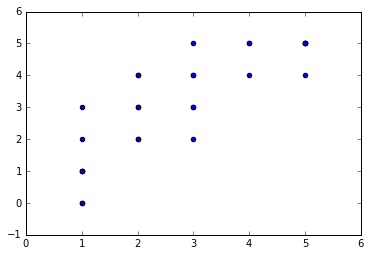

In [5]:
# Draw a scatterplot of this data.
matplotlib.pyplot.scatter(theme_park.Hours,theme_park.Enjoyment)

In [6]:
# Try doing a linear regression on this data
theme_park.sort('Hours', inplace=True)
linear_regression = sklearn.linear_model.LinearRegression()
feature_cols = ['Hours']
X = theme_park[feature_cols]
y = theme_park.Enjoyment
linear_regression.fit(X, y)
lr_predictions = linear_regression.predict(X)

/Users/samuelbolivar/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app
/Users/samuelbolivar/anaconda/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


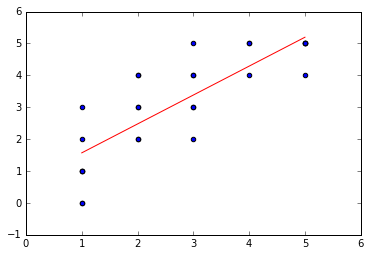

In [7]:
# Plot this regression over the top of the data. Could the regression be better?
matplotlib.pyplot.scatter(theme_park.Hours,theme_park.Enjoyment)
matplotlib.pyplot.plot(theme_park.Hours, lr_predictions, color='red')

In [8]:
# Import the python math library so that we can use the function math.log
import math

In [9]:
# The series called "Hours" inside your dataframe has a method called .map() which will apply a function 
# to every element in the series. e.g. df.Hours.map(math.log)
# Use this to add an extra column to your data frame called "LogHours"
theme_park['LogHours'] = theme_park.Hours.map(math.log)
theme_park.sort('LogHours', inplace=True)

/Users/samuelbolivar/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [10]:
# Try a linear regression of Enjoyment against LogHours
linear_regression2 = sklearn.linear_model.LinearRegression()
feature_cols2 = ['LogHours']
X2 = theme_park[feature_cols2]
y2 = theme_park.Enjoyment
linear_regression2.fit(X2, y2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [11]:
# Use your regressors' predict method to predict some Y values based on LogHours
lr_predictions2 = linear_regression2.predict(X2)

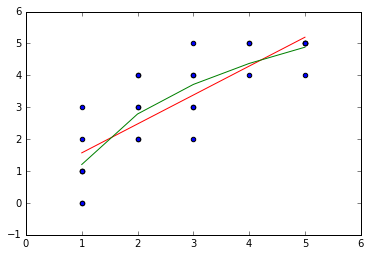

In [12]:
# Create a scatter plot of the original data (i.e. just copy and paste the scatterplot you did before). Overlay
# it with a plot of the new predictions you made (as the y-values) against Hours (not LogHours). This overlay plot
# won't be straight -- it will sag a little on the right.
matplotlib.pyplot.scatter(theme_park.Hours,theme_park.Enjoyment)
matplotlib.pyplot.plot(theme_park.Hours, lr_predictions, color='red')
matplotlib.pyplot.plot(theme_park.Hours, lr_predictions2, color='green')

# Piece-wise linear data

In [13]:
# windpower.csv shows the total amount of wind power generation capacity in various countries between 2006 and 2015
# The country name is in the first column (and makes a good index); the data is TAB separated, so use sep='\t' as an
# argument when you read it in.
wind_power = pandas.read_csv('../../data/windpower.csv',index_col=0,sep='\t')

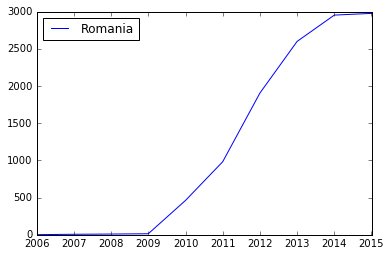

In [14]:
# Plot the wind power generation capacity in Romania
Romania_data = wind_power.loc[['Romania'],:]
Romania_data.T.plot()

In [15]:
Romania_data.T.Romania.values

array([  2.00000000e+00,   7.00000000e+00,   1.00000000e+01,
         1.41000000e+01,   4.62000000e+02,   9.82000000e+02,
         1.90500000e+03,   2.59900000e+03,   2.95300000e+03,
         2.97600000e+03])

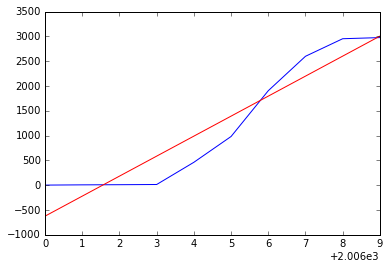

In [16]:
# Try regressing the Romanian data for the whole period.
linear_regression_romania = sklearn.linear_model.LinearRegression()
X_r = pandas.DataFrame(Romania_data.T.index)
y_r = Romania_data.T.Romania.values
linear_regression_romania.fit(X_r, y_r)
lr_predictions_romania = linear_regression_romania.predict(X_r)

matplotlib.pyplot.plot(X_r, Romania_data.T.Romania.values, color='blue')
matplotlib.pyplot.plot(X_r, lr_predictions_romania, color='red')

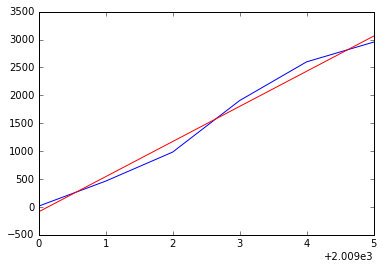

In [17]:
# Try for just 2009 - 2014.
Romania_data_reduced = Romania_data.drop(['2006','2007','2008','2015'],1)
Romania_data_reduced

linear_regression_romania_reduced = sklearn.linear_model.LinearRegression()
X_r2 = pandas.DataFrame(Romania_data_reduced.T.index)
y_r2 = Romania_data_reduced.T.Romania.values
linear_regression_romania_reduced.fit(X_r2, y_r2)
lr_predictions_romania_reduced = linear_regression_romania_reduced.predict(X_r2)

matplotlib.pyplot.plot(X_r2, Romania_data_reduced.T.Romania.values, color='blue')
matplotlib.pyplot.plot(X_r2, lr_predictions_romania_reduced, color='red')


# Other non-linear data

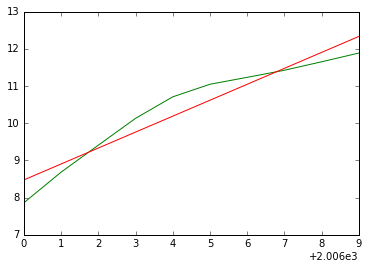

In [18]:
# Plot the wind power generation capacity in China. What do you think you might need to do to the data
import numpy as np
China_data = wind_power.loc[['China'],:]
#China_data.T.plot()

linear_regression_china = sklearn.linear_model.LinearRegression()
X_china = pandas.DataFrame(China_data.T.index)
y_china = np.log(China_data.T.China.values)
linear_regression_china.fit(X_china, y_china)
lr_predictions_china = linear_regression_china.predict(X_china)

#matplotlib.pyplot.plot(X_china, China_data.T.China.values, color='blue')
matplotlib.pyplot.plot(X_china, np.log(China_data.T.China.values), color='green')
matplotlib.pyplot.plot(X_china, lr_predictions_china, color='red')


In [19]:
# Does the Facebook share price show a linear trend, or a faster-than-linear trend? 
# The timeframe from October 2014 to March 2016 is perhaps the clearest.
# If you have time, try to find an effective regression on this data.
import datetime
facebook = pandas.read_csv('../../data/facebook-share-price.csv', sep=',', parse_dates=['Date'], index_col='Date')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x114ef31d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x117508fd0>]], dtype=object)

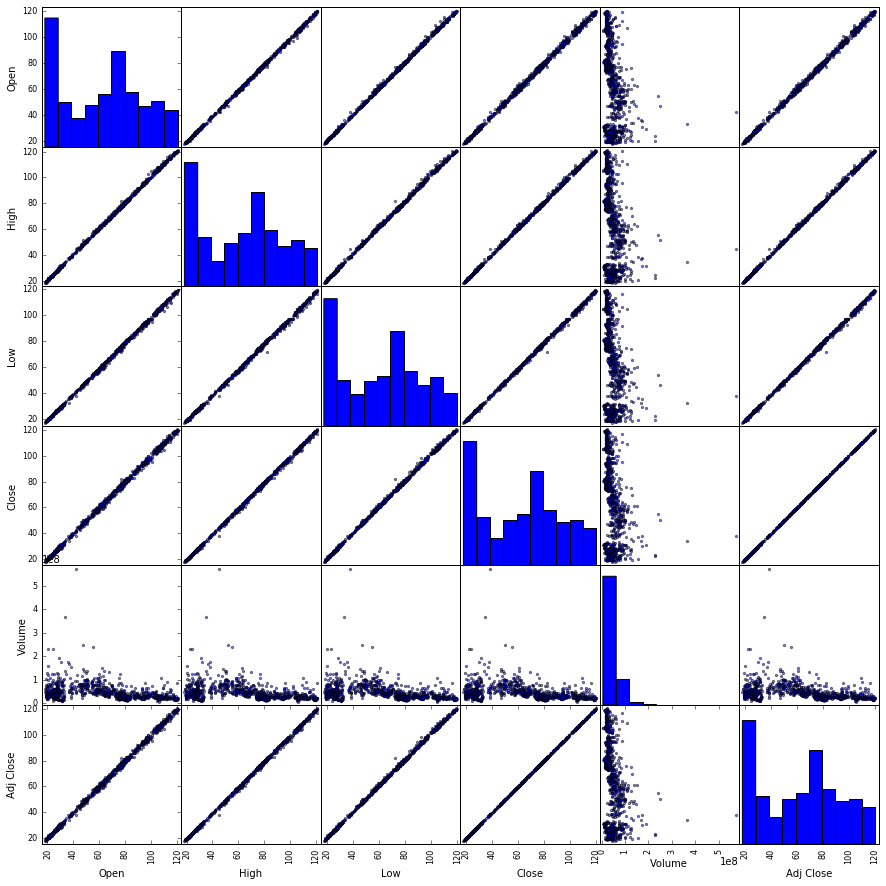

In [20]:
pandas.scatter_matrix(facebook, figsize=(15,15))